Over-fitting/Under-fitting
========================
In this notebook, we will explore the problem of overfitting and underfitting in machine learning, and we will discuss how to address these issues.

Under-fitting: The model is too simple to capture the underlying structure of the data. --> too few features
    or we could say that the model is high-bias.
Over-fitting: The model is too complex and captures noise in the training data. --> too many features
    or we could say that the model is high-variance.
    
We want a model that can generalize well to new, unseen data.

Addressing Over-fitting
=======================
1. Collect more training data.
2. Reduce the number of features --> feature selection
3. Regularization: shrink the weights of some parameters without the need to set it to zero.
        => you get to keep all the features, without any features being overly influential.
Note: It doesn't really make a huge difference if you regularize the bias term or not.

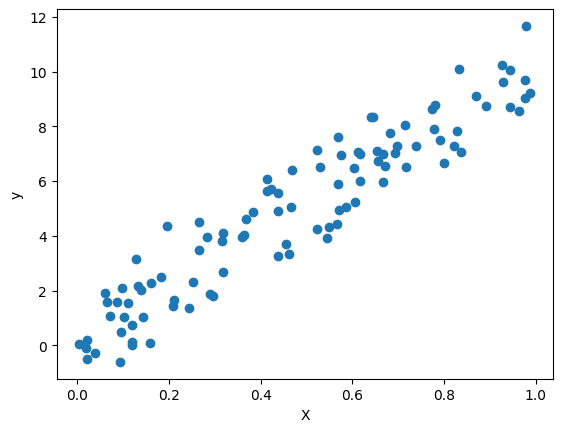

In [2]:
# Let's see an example of over-fitting
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 1)
y = 10 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Accuracy: 0.8921228838344973


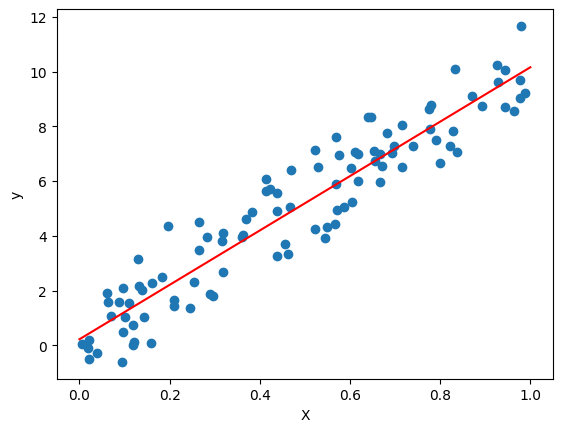

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

acc = model.score(X, y)
print(f'Accuracy: {acc}')

plt.scatter(X, y)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Accuracy: 0.574665824303469


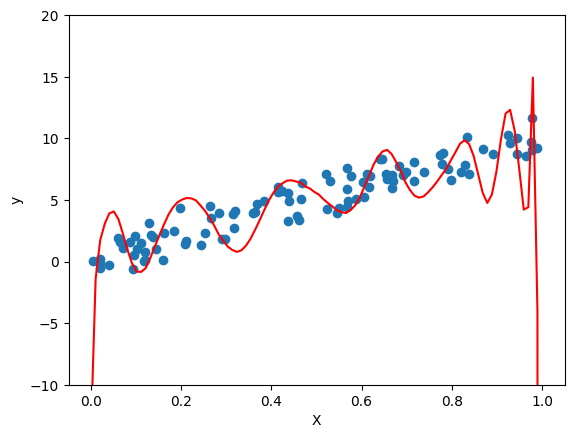

In [4]:
# Let's add some more features to the model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=40)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

acc = model.score(X_poly, y)
print(f'Accuracy: {acc}')

plt.scatter(X, y)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-10, 20)
plt.show()

Regularization
===============
Regularization is a technique used to prevent over-fitting by discouraging overly complex models.
The cost function with regularization:
    J(w) = MSE + lambda/2m * sum(w^2)

This is called L2 regularization.
This formula tries to achieve two goals: 1. fit the training data well, 2. keep the weights small.
The lambda parameter controls the balance between these two goals.
If lambda is too large, the model will be under-fitted.
If lambda is too small, the model will be over-fitted.

Regularized Linear Regression
==============================
In gradient descent, the only thing that changes is the gradient of the cost function.
The gradient of the cost function with regularization:
    grad = 1/m * X.T.dot(X.dot(w) - y) + lambda/m * w
    w -= alpha * grad
So the only difference is the "lambda/m * w" term.

Let's take a closer look:
    w = w(1 - alpha * lambda/m) - alpha * (1/m * X.T.dot(X.dot(w) - y))
The second term is just the gradient of the cost function without regularization.
But what does the first term do?
    w = w(1 - alpha * lambda/m)
Alpha and lambda are both small numbers, so with each iteration, w gets multiplied by a number slightly less than 1.

Regularized Logistic Regression
================================
The cost function with regularization:
    J(w) = -1/m * sum(y * log(h) + (1 - y) * log(1 - h)) + lambda/2m * sum(w^2)
The gradient of the cost function with regularization is the same as that of linear regression,
    except for the fact that the hypothesis function is different.

Accuracy: 0.8746206741984947


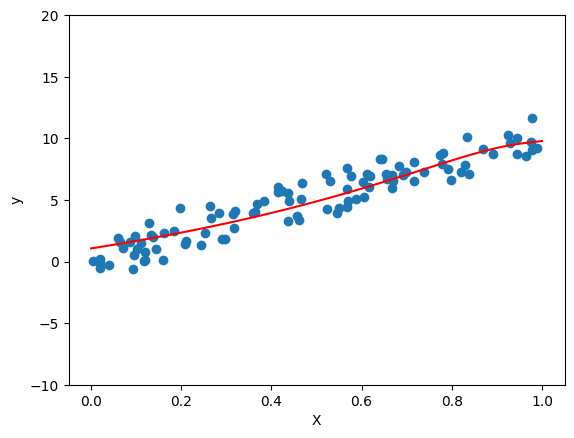

In [5]:
# Let's apply regularization to the polynomial regression model we created earlier
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_poly, y)

y_pred = model.predict(X_test_poly)

acc = model.score(X_poly, y)
print(f'Accuracy: {acc}')

plt.scatter(X, y)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-10, 20)
plt.show()